# **IMPORTING ALL THE NECESSARY LIBRARIES**

In [90]:
import pandas as pd
import numpy as np
import os


from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from IPython.display import display
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **IMPORTING THE TRAINING AND TESTING DATASETS**

In [91]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/medicare_fraud_detection/medicure_train_test'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
#importing the training dataset
train = pd.read_csv('/content/drive/MyDrive/medicare_fraud_detection/medicure_train_test/train.csv')

In [93]:
#importing the testing dataset
test = pd.read_csv('/content/drive/MyDrive/medicare_fraud_detection/medicure_train_test/test.csv')

In [94]:
#importing the test data for predictions
test_predictions = pd.read_csv('/content/drive/MyDrive/medicare_fraud_detection/datasets/Test-1542969243754.csv')

# **PREPARING THE DATA**

In [95]:
#Shuffling the training datset
train = train.sample(frac=1).reset_index(drop=True)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 62 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  int64  
 1   ClaimID                          558211 non-null  int64  
 2   ClaimStartDt                     558211 non-null  int64  
 3   ClaimEndDt                       558211 non-null  int64  
 4   Provider                         558211 non-null  int64  
 5   InscClaimAmtReimbursed           558211 non-null  float64
 6   AttendingPhysician               558211 non-null  float64
 7   OperatingPhysician               558211 non-null  float64
 8   OtherPhysician                   558211 non-null  float64
 9   AdmissionDt                      558211 non-null  int64  
 10  ClmAdmitDiagnosisCode            558211 non-null  float64
 11  DeductibleAmtPaid                558211 non-null  float64
 12  Di

In [97]:
cols_to_drop = ['DOB','DOD']
train = train.drop(columns=cols_to_drop)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 60 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  int64  
 1   ClaimID                          558211 non-null  int64  
 2   ClaimStartDt                     558211 non-null  int64  
 3   ClaimEndDt                       558211 non-null  int64  
 4   Provider                         558211 non-null  int64  
 5   InscClaimAmtReimbursed           558211 non-null  float64
 6   AttendingPhysician               558211 non-null  float64
 7   OperatingPhysician               558211 non-null  float64
 8   OtherPhysician                   558211 non-null  float64
 9   AdmissionDt                      558211 non-null  int64  
 10  ClmAdmitDiagnosisCode            558211 non-null  float64
 11  DeductibleAmtPaid                558211 non-null  float64
 12  Di

In [98]:
test = test.drop(columns=cols_to_drop)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135392 entries, 0 to 135391
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           135392 non-null  int64  
 1   ClaimID                          135392 non-null  int64  
 2   ClaimStartDt                     135392 non-null  int64  
 3   ClaimEndDt                       135392 non-null  int64  
 4   Provider                         135392 non-null  int64  
 5   InscClaimAmtReimbursed           135392 non-null  float64
 6   AttendingPhysician               135392 non-null  float64
 7   OperatingPhysician               135392 non-null  float64
 8   OtherPhysician                   135392 non-null  float64
 9   AdmissionDt                      135392 non-null  int64  
 10  ClmAdmitDiagnosisCode            135392 non-null  float64
 11  DeductibleAmtPaid                135392 non-null  float64
 12  Di

In [99]:
#splitting the train dateset into training and validation in the ratio 4:1 or 8:2
train_df, val_df = train_test_split(train,test_size=0.2,random_state=42)

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135392 entries, 0 to 135391
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           135392 non-null  int64  
 1   ClaimID                          135392 non-null  int64  
 2   ClaimStartDt                     135392 non-null  int64  
 3   ClaimEndDt                       135392 non-null  int64  
 4   Provider                         135392 non-null  int64  
 5   InscClaimAmtReimbursed           135392 non-null  float64
 6   AttendingPhysician               135392 non-null  float64
 7   OperatingPhysician               135392 non-null  float64
 8   OtherPhysician                   135392 non-null  float64
 9   AdmissionDt                      135392 non-null  int64  
 10  ClmAdmitDiagnosisCode            135392 non-null  float64
 11  DeductibleAmtPaid                135392 non-null  float64
 12  Di

In [101]:
#Preparing the features and the labels
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

#for validation data
X_val=  val_df.iloc[:,:-1]
y_val = val_df.iloc[:,-1]

#for testing data
X_test = test

In [102]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135392 entries, 0 to 135391
Data columns (total 59 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           135392 non-null  int64  
 1   ClaimID                          135392 non-null  int64  
 2   ClaimStartDt                     135392 non-null  int64  
 3   ClaimEndDt                       135392 non-null  int64  
 4   Provider                         135392 non-null  int64  
 5   InscClaimAmtReimbursed           135392 non-null  float64
 6   AttendingPhysician               135392 non-null  float64
 7   OperatingPhysician               135392 non-null  float64
 8   OtherPhysician                   135392 non-null  float64
 9   AdmissionDt                      135392 non-null  int64  
 10  ClmAdmitDiagnosisCode            135392 non-null  float64
 11  DeductibleAmtPaid                135392 non-null  float64
 12  Di

# **TRAINING**

In [103]:
#creating a function for the perfromance of models

def cal_metrics(y_actual,y_pred):
  metrics={}
  metrics['Accuracy'] = accuracy_score(y_actual,y_pred)
  metrics['Precision'] = precision_score(y_actual,y_pred)
  metrics['Recall'] = recall_score(y_actual,y_pred)
  metrics['F1-score'] = f1_score(y_actual,y_pred)

  return metrics

In [104]:
#creating a function for the confusion matrix of models

def plot_confusion_matrix(y_actual, y_pred, model_name):
    cm = confusion_matrix(y_actual, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix - ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Logistic Regression

In [105]:
#Logistic Regression

#training the data
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

#Validate model on validation data
y_val_pred_logistic = logistic_model.predict(X_val)

In [106]:
#getting the validation scores for logistic regression

metrics_logistic = cal_metrics(y_val,y_val_pred_logistic)

#printing the metrics
print("Metrics for Logistic Regression:")
print(metrics_logistic)

Metrics for Logistic Regression:
{'Accuracy': 0.6260132744551831, 'Precision': 0.5840288315629742, 'Recall': 0.07221088674687492, 'F1-score': 0.12852998267621216}


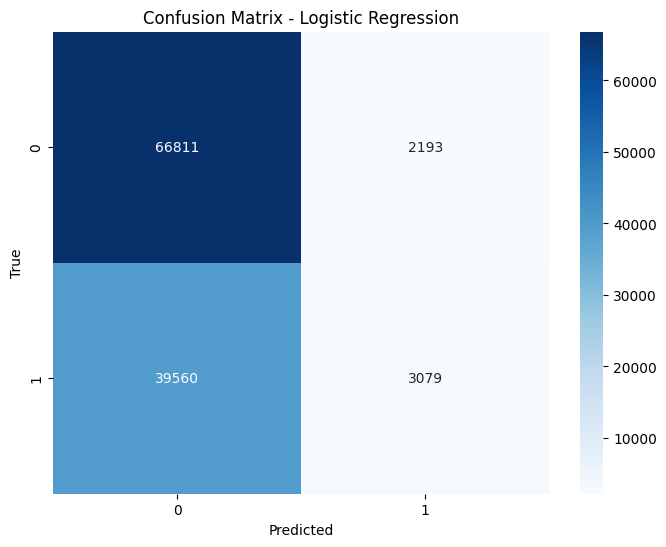

In [107]:
#generate confusion matrix for linear regression
plot_confusion_matrix(y_val,y_val_pred_logistic,'Logistic Regression')

RANDOM FOREST

In [108]:
#Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100,random_state=42)

#training the model on training data
random_forest_model.fit(X_train,y_train)

#validating
y_val_pred_rf = random_forest_model.predict(X_val)

In [109]:
#getting the validation score for random forest
metrics_rf = cal_metrics(y_val,y_val_pred_rf)

#printing the metrics
print("Metrics for Random Forest:")
print(metrics_rf)

Metrics for Random Forest:
{'Accuracy': 0.8458927115896205, 'Precision': 0.8879263010188518, 'Recall': 0.6826614132601608, 'F1-score': 0.771880510733085}


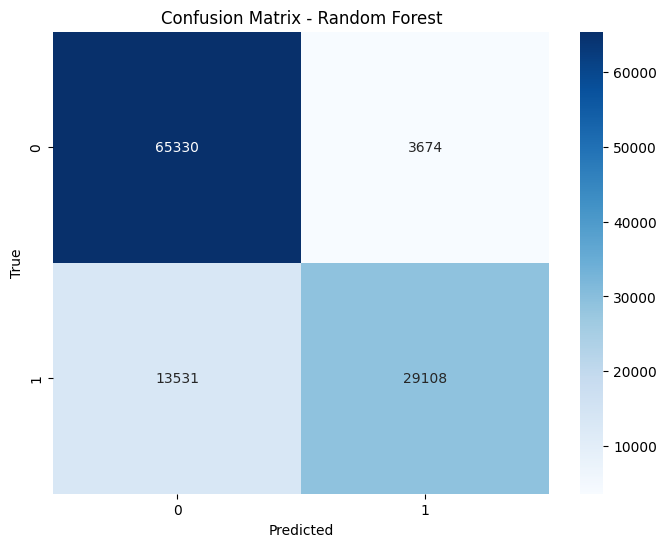

In [110]:
#generating the confusion matrix for random forest
plot_confusion_matrix(y_val,y_val_pred_rf,'Random Forest')

NAIVE BAYES

In [111]:
#Naive bayes
naive_bayes_model = GaussianNB()

#training the model on the training dataset
naive_bayes_model.fit(X_train,y_train)

#validating the model on validation data
y_val_pred_nb = naive_bayes_model.predict(X_val)

In [112]:
#getting the validation score
metrics_nb = cal_metrics(y_val,y_val_pred_nb)

#printing the metrics
print("Metrics for Naive Bayes:")
print(metrics_nb)

Metrics for Naive Bayes:
{'Accuracy': 0.6278763558843815, 'Precision': 0.5807976366322009, 'Recall': 0.09221604634255025, 'F1-score': 0.15916128640531077}


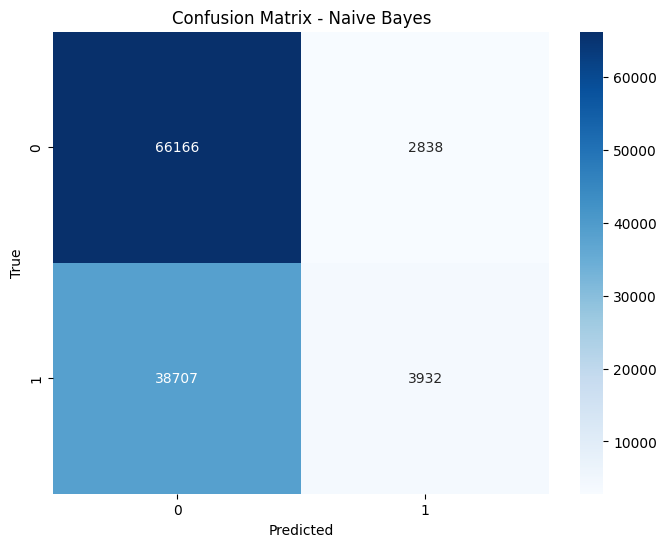

In [113]:
#generating the confusion matrix for Naive Bayes
plot_confusion_matrix(y_val,y_val_pred_nb,'Naive Bayes')

KNN

In [114]:
#KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

#training the model on the training dataset
knn_model.fit(X_train,y_train)

#validating the model on the validation data
y_val_pred_knn = knn_model.predict(X_val)

In [115]:
#getting the validation score for knn
metrics_knn = cal_metrics(y_val,y_val_pred_knn)

#printing the metrics
print("Metrics for KNN:")
print(metrics_knn)

Metrics for KNN:
{'Accuracy': 0.5608322958000054, 'Precision': 0.4013338685274956, 'Recall': 0.3048382935809939, 'F1-score': 0.34649321568522906}


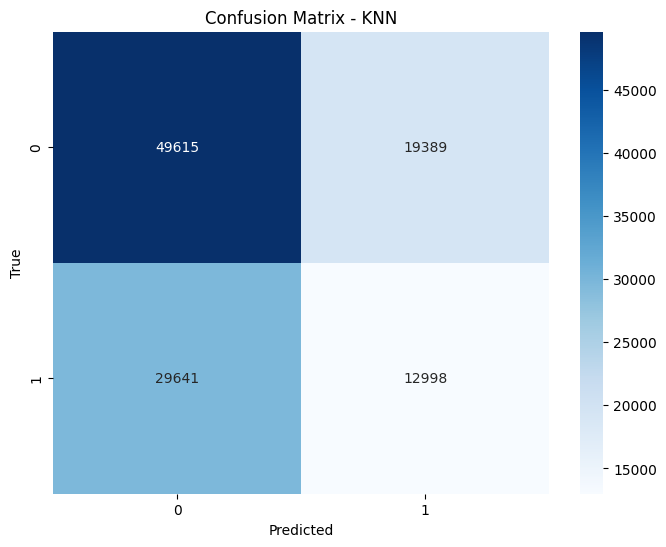

In [116]:
#generating the confusion matrix for knn
plot_confusion_matrix(y_val,y_val_pred_knn,'KNN')

XGBOOST

In [117]:
#Xgboost
xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=42)

#training the model on the training dataset
xgb_model.fit(X_train,y_train)

#validating the model on the validation data
y_val_pred_xgb = xgb_model.predict(X_val)


In [118]:
#getting the validation score for xgboost
metrics_xgb = cal_metrics(y_val,y_val_pred_xgb)

#printing the metrics
print("Metrics for XGBoost:")
print(metrics_xgb)

Metrics for XGBoost:
{'Accuracy': 0.9012656413747391, 'Precision': 0.89862820254186, 'Recall': 0.8357606885714955, 'F1-score': 0.8660550458715597}


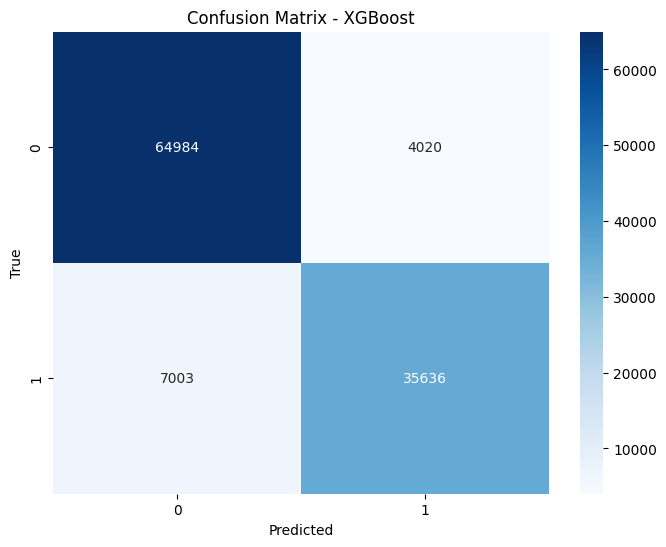

In [119]:
#generating the confusion matrix for XGboost
plot_confusion_matrix(y_val,y_val_pred_xgb,'XGBoost')


Neural Network ANN

In [120]:
#Bulding the ANN model
ann_model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

#compiling the model
ann_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

#train the model
history = ann_model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_val,y_val))


Epoch 1/10
13956/13956 [==============================] - 50s 4ms/step - loss: 92.0553 - accuracy: 0.5345 - val_loss: 25.6067 - val_accuracy: 0.3859
Epoch 2/10
13956/13956 [==============================] - 46s 3ms/step - loss: 6.8927 - accuracy: 0.5509 - val_loss: 0.6806 - val_accuracy: 0.5954
Epoch 3/10
13956/13956 [==============================] - 46s 3ms/step - loss: 0.6655 - accuracy: 0.6187 - val_loss: 0.6651 - val_accuracy: 0.6181
Epoch 4/10
13956/13956 [==============================] - 51s 4ms/step - loss: 0.6647 - accuracy: 0.6190 - val_loss: 0.6651 - val_accuracy: 0.6181
Epoch 5/10
13956/13956 [==============================] - 44s 3ms/step - loss: 0.6647 - accuracy: 0.6190 - val_loss: 0.6651 - val_accuracy: 0.6181
Epoch 6/10
13956/13956 [==============================] - 50s 4ms/step - loss: 0.6647 - accuracy: 0.6190 - val_loss: 0.6651 - val_accuracy: 0.6181
Epoch 7/10
13956/13956 [==============================] - 46s 3ms/step - loss: 0.6646 - accuracy: 0.6190 - val_loss:

In [121]:
#validate the model
y_val_pred_prob_ann = ann_model.predict(X_val)
y_val_pred_ann = (y_val_pred_prob_ann > 0.5).astype(int)

#getting the accuracy
metrics_ann = cal_metrics(y_val,y_val_pred_ann)

#printing the metrics
print("Metrics for ANN:")
print(metrics_ann)

3489/3489 [==============================] - 6s 2ms/step
Metrics for ANN:
{'Accuracy': 0.6180683070143225, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0}


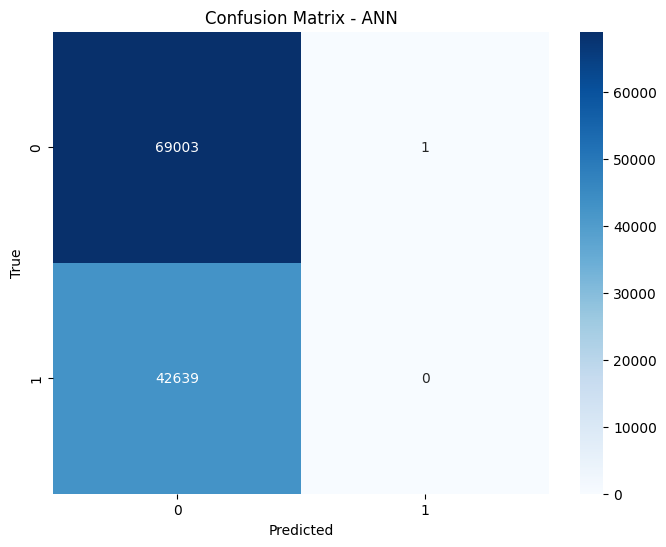

In [122]:
#generating the confusion matrix for ANN
plot_confusion_matrix(y_val,y_val_pred_ann,'ANN')

## **Comparing all the models with a metrics table**

In [123]:
model_metrics = {}
model_metrics['Logistic Regression'] = metrics_logistic
model_metrics['Random Forest'] = metrics_rf
model_metrics['KNN'] = metrics_knn
model_metrics['XGBoost'] = metrics_xgb
model_metrics['Naive Bayes'] = metrics_nb
model_metrics['ANN'] = metrics_ann

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to have models as rows and metrics as columns

# Display the comparison table
print(metrics_df)

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.626013   0.584029  0.072211  0.128530
Random Forest        0.845893   0.887926  0.682661  0.771881
KNN                  0.560832   0.401334  0.304838  0.346493
XGBoost              0.901266   0.898628  0.835761  0.866055
Naive Bayes          0.627876   0.580798  0.092216  0.159161
ANN                  0.618068   0.000000  0.000000  0.000000


As we can see from the comparison table, XGBoost is the best perfoming model. So, we will select XGBoost for testing  

# **TESTING**

In [124]:
# Test Model

predictions_final = xgb_model.predict(X_test)

indices_to_print = [0,1,2,4,5]
#printing the predictions

for index in indices_to_print:
    print(predictions_final[index])

0
0
0
0
0


In [128]:
predictions_final.shape

(135392,)

CONVERTING THE PREDICTED VALUES OF TESTING TO A CSV

In [130]:
predictions_df = pd.DataFrame({'Predictions': predictions_final})
predictions_df.to_csv('predictions.csv',index=False)